In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

from langevin.simulation import run_langevin_simulation
from langevin.analysis import compute_msd, estimate_diffusion_from_msd
from langevin.fitting import fit_model,VFT_gamma

In [5]:
dt = 1e-2
n_particles = 100
t_max = 1000.
n_steps = int(t_max/dt)
m=1.0
gamma_l = 1.
gamma_g = 1e2
kB=1.

T_ = np.arange(0.11,0.21,0.01)
T_0=0.1
tau = 1

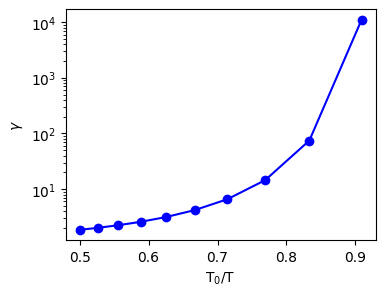

In [8]:
gamma_s = VFT_gamma(T_)
gamma_f = np.ones(len(T_))
gamma_avg = np.average(np.array([gamma_s, gamma_f]), axis=0)

plt.figure(figsize=[4,3])
plt.plot(T_0/T_, gamma_avg,'o-', c='blue')
plt.yscale('log')
plt.xlabel(r'T$_0$/T')
plt.ylabel(r'$\gamma$')
plt.show()

In [9]:
msd_ = []
time_lags_ = []
D_SE = []

for i, T in enumerate(T_):
    start_ = time.time()
    
    gamma_g = VFT_gamma(T)

    # Run simulation
    positions, gamma_values, velocities = run_langevin_simulation(
        T=T,tau=tau, n_steps=n_steps,n_particles=n_particles,dt=dt,
        gamma_l=gamma_l,gamma_g=gamma_g,m=m,
        kB=kB,seed=2)
    
    # Compute MSD using regular method
    time_lags, msd = compute_msd(positions, dt=dt)

    # Store results
    msd_.append(msd)
    time_lags_.append(time_lags)

    end_ = time.time()
    print(f"T = {T:.3f} | {end_ - start_:.2f} seconds")

T = 0.110 | 4.64 seconds
T = 0.120 | 4.66 seconds
T = 0.130 | 4.54 seconds
T = 0.140 | 4.49 seconds
T = 0.150 | 4.37 seconds
T = 0.160 | 4.51 seconds
T = 0.170 | 4.45 seconds
T = 0.180 | 4.45 seconds
T = 0.190 | 4.41 seconds
T = 0.200 | 4.43 seconds


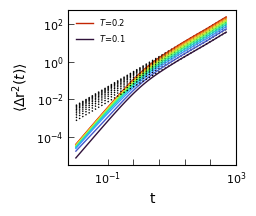

In [10]:
# === Calculate D_msd  ===

plt.figure(figsize=(2.5, 2.1))
colors = plt.cm.turbo(np.linspace(0, 0.9, len(T_)))
D_msd = []

for i in range(len(T_)):
    time_lags = np.array(time_lags_[i])
    msd_t = np.array(msd_[i])
    
    D_eff, popt, pcov = estimate_diffusion_from_msd(time_lags, msd_t)
    D_msd.append(D_eff)

# Plot MSDs with fits
for i in reversed(range(len(T_))):
    time_lags = np.array(time_lags_[i])
    msd_t = np.array(msd_[i])
    _, popt, _ = estimate_diffusion_from_msd(time_lags, msd_t)
    
    #if i == len(T_) - 1:
    plt.plot(time_lags, linear(time_lags, *popt*4), ':', c='black', alpha=1, lw=1)
    
    if (i % 10 == 0) or i == len(T_) - 1:
        plt.plot(time_lags, msd_t, '-', c=colors[i], alpha=1, label=fr'$T$={T_[i]:.1f}', lw=1)
    else:
        plt.plot(time_lags, msd_t, '-', c=colors[i], alpha=1, lw=1)

plt.xlabel("t", fontsize=10)
plt.ylabel(r'$\langle \Delta \mathrm{r}^2(t) \rangle$', fontsize=10)
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, fontsize=6)
plt.tick_params(axis='both', which='major', labelsize=8, direction='in', length=4, width=0.5)
plt.tick_params(axis='both', which='minor', labelsize=8, direction='in', length=2, width=0.5)
plt.xticks(np.logspace(-1, 3, 6))

plt.tight_layout(pad=0.5)
#plt.savefig('figs/Fig_SI1.pdf', dpi=300)
plt.show()

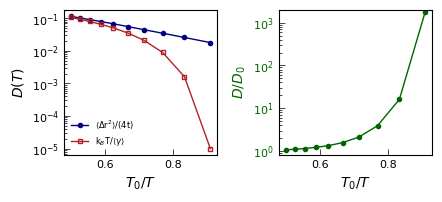

In [11]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(4.5, 2.1))

# First subplot (single y-axis)
axs[0].plot(T_0/T_, np.array(D_msd), '-o', c='navy', label=r'$\langle \Delta$r$^2$$\rangle$/(4t)', lw=1,ms=3)
D_SE_avg = kB*T_/gamma_avg
axs[0].plot(T_0/T_,D_SE_avg , marker='s',ls='-', lw=1, c='firebrick', label=r'k$_B$T/$\langle γ \rangle$',ms=3,markerfacecolor="None")

#axs[0].plot(T_0/T_, np.array(D_SE), marker='s',ls='--', lw=1, c='firebrick', label=r'k$_B$T/$\langle γ \rangle$',ms=3,markerfacecolor="None")
axs[0].set_xlabel(r"$\it{T}_0/\it{T}$", fontsize=10)
axs[0].set_ylabel(r"$\it{D(T)}$", fontsize=10)
axs[0].legend(frameon=False, fontsize=6)
axs[0].tick_params(axis='both', which='major', labelsize=8, direction='in', length=4, width=0.5)
axs[0].tick_params(axis='both', which='minor', labelsize=8, direction='in', length=2, width=0.5)
#plt.xlim(0,1.6)
#plt.text(-0.08, 1.45,'(a)')
axs[0].set_yscale('log')
#ax2.set_xlim(0.45, 0.95)

# Second subplot (dual y-axis)
ax1 = axs[1]
#ax2 = ax1.twinx() # Create a twin Axes sharing the x-axis

ax1.plot(T_0/T_, np.array(D_msd)/D_SE_avg, '-o', c='darkgreen', lw=1,ms=3)
#plt.axvline(1, ls='--', c='black', lw=1)
ax1.set_xlabel(r"$\it{T}_0/\it{T}$", fontsize=10)
ax1.set_ylabel(r"$\it{D/D}_0$", fontsize=10, color='darkgreen')
ax1.tick_params(axis='both', which='major', labelsize=8, direction='in', length=4, width=0.5)
ax1.tick_params(axis='both', which='minor', labelsize=8, direction='in', length=2, width=0.5)
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.set_yscale('log')
ax1.set_ylim(0.8, 2e3)
#ax1.set_ylim(0, 18)
#plt.ylim(0,10)
#plt.text(-0.7, 16,'(b)')
#plt.xlim(0.2,0.8)
#T_2 = np.arange(T_[0],T_[-1],0.001)
#ax2.plot(T_0/T_2, logistic(T_2, T_0=0.1, delta=0.01), color='gray', ls='--', lw=1)
#ax2.set_ylabel(r"$\it{P_{l \to g}}$", fontsize=10, color='gray')

#ax2.tick_params(axis='y', labelcolor='gray', labelsize=8)
#ax2.set_yticks([0,0.02,1])
#ax2.set_ylim(-0.015,0.25)
#ax2.set_xlim(0.45, 0.98)


plt.tight_layout(pad=1)
#plt.savefig('figs/Fig3.pdf', dpi=300)
plt.show()